In [ ]:
import n_gram # out implementation of the ngram
import numpy as np
import matplotlib.pyplot as plt
import json
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def to_byte_pair(context, vocab):
    """
    Tokenize a string into subword units using a simple greedy byte-pair-like algorithm.

    Args:
        context (str): The input string to tokenize.
        vocab (list of str): Known subword tokens, e.g. from a BPE vocabulary.

    Returns:
        list of str: The tokenized input as a list of matched tokens and any leftover characters.
    """
    # Replace spaces with underscores for consistent token matching
    context = context.lower()
    context += "_"
    context = context.replace(' ', '_')
    punctuation = [ '.', '!', '?', ':', ';']
    def remove_punctuation(input_string):
        result = input_string
        for char in punctuation:
            if char != ' ':
                result = result.replace(char, f'_{char}')
        return result

    context = remove_punctuation(context)

    # Sort vocabulary (longer matches first)
    vocab.sort(key=lambda x: len(x), reverse=True)

    final_list = []
    mismatch = ""

    while context != "":
        old_context = context
        match = False

        # Try to find the longest matching token at the current position
        for token in vocab:
            if token == context[:len(token)]:
                if mismatch:
                    final_list.append(mismatch)  # Add any mismatched leftover
                final_list.append(token)
                context = context[len(token):]  # Remove matched part
                mismatch = ""
                match = True
                break

        # If no match, accumulate unmatched character(s)
        if not match:
            mismatch += context[0]
            context = context[1:]
       
        if old_context == context:
            break  #break to prevent infinite loop

    # Add any leftover mismatches at the end
    if mismatch:
        final_list.append(mismatch)

    return final_list

Generate perplexities for the different n-grams/datasets

In [ ]:
# best merges

best = []
with open("../new_corpora/vocab_best.json", "r", encoding="utf-8") as f:
        best_vocab = json.load(f)

with open("../new_corpora/Shakespeare_best_merge_train.txt", "r") as f:
    n_gram_corps_train = f.read().split() 

with open("../new_corpora/Shakespeare_best_merge_test.txt", "r") as f:
    n_gram_corps_test = f.read().split() 

best_fourgram = n_gram.N_gram(n_gram_corps_train, 4, best_vocab)
for n in range(4):
    print("N-gram order: ", n+1)    
    best.append(best_fourgram.perplexity(n_gram_corps_test, n+1))

N-gram order:  1
Order: 1, perplexity: 434.09
N-gram order:  2
Order: 2, perplexity: 158.48
N-gram order:  3
Order: 3, perplexity: 396.30
N-gram order:  4
Order: 4, perplexity: 529.93


In [ ]:
# 2nd best merges

medium = []
with open("../new_corpora/vocab_2nd.json", "r", encoding="utf-8") as f:
    medium_vocab = json.load(f)

with open("../new_corpora/Shakespeare_2nd_best_merge_train.txt", "r") as f:
    medium_corps_train = f.read().split() 

with open("../new_corpora/Shakespeare_2nd_best_merge_test.txt", "r") as f:
    medium_corps_test = f.read().split() 

medium_fourgram = n_gram.N_gram(medium_corps_train, 4, medium_vocab)
for n in range(4):
    print("N-gram order: ", n+1)    
    medium.append(medium_fourgram.perplexity(medium_corps_test, n+1))

N-gram order:  1
Order: 1, perplexity: 450.48
N-gram order:  2
Order: 2, perplexity: 174.73
N-gram order:  3
Order: 3, perplexity: 439.85
N-gram order:  4
Order: 4, perplexity: 582.56


In [ ]:
# 3rd best merges

worst = []

with open("../new_corpora/vocab_3rd.json", "r", encoding="utf-8") as f:
        worst_vocab = json.load(f)

with open("../new_corpora/Shakespeare_3rd_best_merge_train.txt", "r") as f:
    worst_corps_train = f.read().split() 

with open("../new_corpora/Shakespeare_3rd_best_merge_test.txt", "r") as f:
    worst_corps_test = f.read().split() 

worst_fourgram = n_gram.N_gram(worst_corps_train, 4, worst_vocab)
for n in range(4):
    print("N-gram order: ", n+1)    
    worst.append(worst_fourgram.perplexity(worst_corps_test, n+1))

N-gram order:  1
Order: 1, perplexity: 467.78
N-gram order:  2
Order: 2, perplexity: 192.29
N-gram order:  3
Order: 3, perplexity: 485.23
N-gram order:  4
Order: 4, perplexity: 634.74


In [ ]:
all_perplexities = np.array([best, medium, worst])

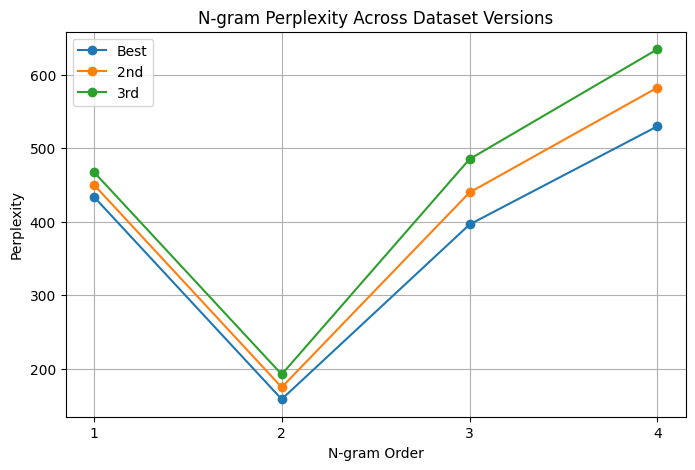

In [ ]:
def plot_perplexities(all_perplexities, fig_path):
    """ plot the perplexities for the different n's in the n-grams """
    n_grams = [1, 2, 3, 4]
    versions = ["Best", "2nd", "3rd"]
    plt.figure(figsize=(8,5))
    for i in range(all_perplexities.shape[0]):
        plt.plot(n_grams, all_perplexities[i], marker='o', label=versions[i])
        plt.xticks(n_grams)
        plt.xlabel("N-gram Order")
        plt.ylabel("Perplexity")
        plt.title("N-gram Perplexity Across Dataset Versions")
        plt.legend()
        plt.grid(True)
        plt.savefig(fig_path)
        
plot_perplexities(all_perplexities, "../img/ngram_perplexities.png")

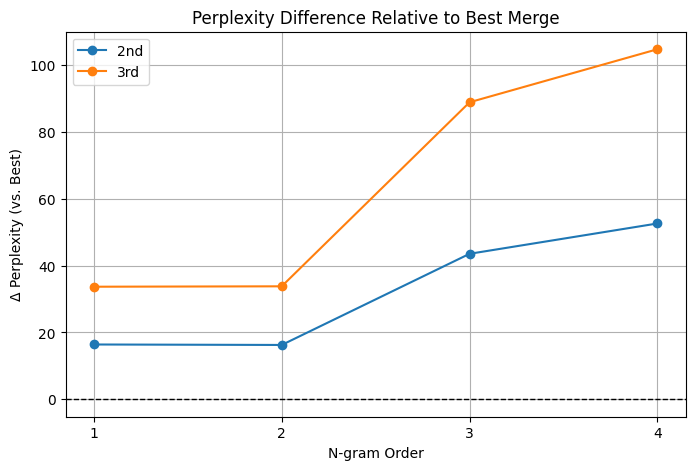

In [ ]:

def plot_prplx_diff(all_perplexities, fig_path):
    """ plot how the performance of the worse merges differs from the best"""
    n_grams = [1, 2, 3, 4]
    versions = ["2nd", "3rd"]

    # compute differences relative to "Best"
    diffs = all_perplexities[1:] - all_perplexities[0]

    plt.figure(figsize=(8,5))
    for i in range(diffs.shape[0]):
        plt.plot(n_grams, diffs[i], marker='o', label=versions[i])

    plt.xticks(n_grams)
    plt.xlabel("N-gram Order")
    plt.ylabel("Δ Perplexity (vs. Best)")
    plt.title("Perplexity Difference Relative to Best Merge")
    plt.axhline(0, color="black", linewidth=1, linestyle="--")
    plt.legend()
    plt.grid(True)
    plt.savefig(fig_path)
    
plot_prplx_diff(all_perplexities, "../img/ngram_perplexities2.png")

Generate examples for the different n-grams/datasets

In [ ]:
# best merge

context="cleopatra is my"
for i in range(4):
    byte = to_byte_pair(context, best_vocab)
    text = best_fourgram.generate(i+1,100, byte, 3)
    print(f"best, n = {i+1}: {text}")

best, n = 1: cleopatra is my . 
best, n = 2: cleopatra is my lord . 
best, n = 3: cleopatra is my name is cing and the wings of my heart : 
best, n = 4: cleopatra is my business : 


In [ ]:
# 2nd best merge

context="cleopatra is my"
for i in range(4):
    byte = to_byte_pair(context, medium_vocab)
    text = medium_fourgram.generate(i+1,100, byte, 3)
    print(f"medium, n = {i+1}: {text}")

medium, n = 1: cleopatra is my , , the , the , , the . 
medium, n = 2: cleopatra is my lord polonius i have a little . 
medium, n = 3: cleopatra is my name is cius, and i am glad on't . 
medium, n = 4: cleopatra is my name ; 


In [ ]:
# 3rd best merge

context="cleopatra is my"
for i in range(4):
    byte = to_byte_pair(context, worst_vocab)
    text = worst_fourgram.generate(i+1,100, byte, 3)
    print(f"worst, n = {i+1}: {text}")

worst, n = 1: cleopatra is my , the , . 
worst, n = 2: cleopatra is my heart : 
worst, n = 3: cleopatra is my lord ; 
worst, n = 4: cleopatra is my lord angry ? 
